In [77]:
#LIBRARIES
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing, linear_model, metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#LOAD DATASET
df = pd.read_csv("churning_customers.csv")
#print(df.columns)
#print(df.head(1))

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Use the Multinomonial Logistic Regression Model

Logistic Regression model accuracy: 78.04%
Precision = 62.45%
Recall = 43.58%%
Confusion Matrix =  [[935  98]
 [211 163]]


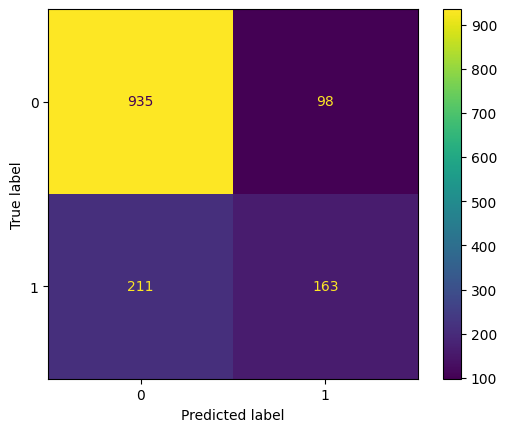

In [115]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

# define the features and the target
X = np.asarray(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# turned the target to int as is required for the model 
y = np.asarray(df['Churn'].map({'Yes': 1, 'No': 0}).values)


# train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

# Precision
Precision = metrics.precision_score(y_test, y_pred)
print(f"Precision = {Precision * 100:.2f}%")

#Recall
recall = metrics.recall_score(y_test, y_pred)
print(f"Recall = {recall * 100:.2f}%%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix = ", cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()

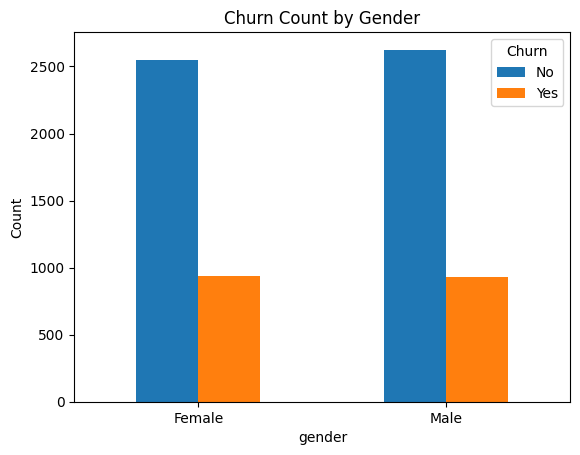

In [ ]:

df.groupby(['gender', 'Churn']).size().unstack().plot(kind='bar')
plt.title('Churn Vs. Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Use Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
randfor.fit(X_train, y_train)
y_pred = randfor.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7583511016346838
Confusion Matrix:
 [[905 128]
 [212 162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407

